<a href="https://colab.research.google.com/github/srirams1983/Car-Brand--Deep-Learning/blob/main/Car_Brand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/srirams1983/Car-Brand--Deep-Learning.git

Cloning into 'Car-Brand--Deep-Learning'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
!wget https://github.com/srirams1983/Car-Brand--Deep-Learning/blob/main/Datasets.zip

--2020-11-15 04:26:40--  https://github.com/srirams1983/Car-Brand--Deep-Learning/blob/main/Datasets.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Datasets.zip.1’

Datasets.zip.1          [ <=>                ]  89.87K  --.-KB/s    in 0.04s   

2020-11-15 04:26:40 (2.29 MB/s) - ‘Datasets.zip.1’ saved [92024]



In [ ]:
%cd '/content/Car-Brand--Deep-Learning'
%ls
import requests, zipfile, io
!unzip Datasets.zip 

/content/Car-Brand--Deep-Learning
AccVal_acc.png             Datasets.zip      model_resnet50.h5
Car-Brand--Deep-Learning/  Datasets.zip.1    README.md
Datasets/                  LossVal_loss.png  results.csv
Archive:  Datasets.zip
replace Datasets/Test/audi/21.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Datasets/Test/audi/22.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!pip install tensorflow==2.2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/Car-Brand--Deep-Learning/Datasets/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Car-Brand--Deep-Learning/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
display(training_set.image_shape)


(224, 224, 3)

In [ ]:
test_set = test_datagen.flow_from_directory('/content/Car-Brand--Deep-Learning/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 29,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  generator = training_set,
  validation_data=test_set,
  epochs=50 
)

Epoch 1/50
2/2 [==============================] - 14s 7s/step - loss: 3.8283 - accuracy: 0.3438 - val_loss: 18.9423 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 14s 7s/step - loss: 11.6622 - accuracy: 0.3906 - val_loss: 9.8481 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 14s 7s/step - loss: 5.5907 - accuracy: 0.3594 - val_loss: 2.9147 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 14s 7s/step - loss: 3.6794 - accuracy: 0.3438 - val_loss: 1.9134 - val_accuracy: 0.5345
Epoch 5/50
2/2 [==============================] - 14s 7s/step - loss: 2.3534 - accuracy: 0.4375 - val_loss: 4.0238 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 14s 7s/step - loss: 3.0118 - accuracy: 0.3594 - val_loss: 4.9044 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 14s 7s/step - loss: 2.5978 - accuracy: 0.4219 - val_loss: 1.1261 - val_accuracy: 0.4655
Epoch 8/50
2/2 [================

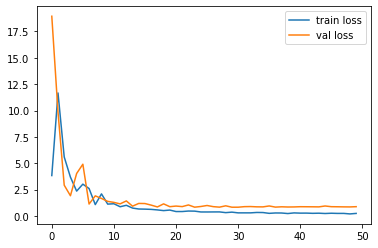

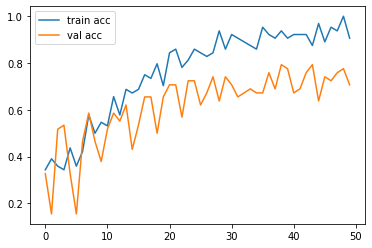

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
display(len(y_pred))

58

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
STEP_SIZE_TEST=test_set.n//test_set.batch_size
test_set.reset()
pred=model.predict_generator(test_set,
steps=STEP_SIZE_TEST,
verbose=1)

2/2 [==============================] - 4s 2s/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
display(predicted_class_indices.shape)

In [ ]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
display(len(predictions))
display(len(filenames))

58

58

In [ ]:
filenames=test_set.filenames
import pandas as pd
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)